In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions

from stable_baselines3 import A2C

In [40]:
env = gym.make(
    'stocks-v0',
    window_size=10,
    frame_bound=(10, 90)
)

In [41]:
env.reset()
model = A2C('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=10000)

In [43]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 34, <Actions.Buy: 1>: 45}
info: {'total_reward': 13.218231201171875, 'total_profit': 0.8195673006733516, 'position': <Positions.Long: 1>}


In [44]:
# plt.figure(figsize=(16, 6))
# env.unwrapped.render_all()
# plt.show()

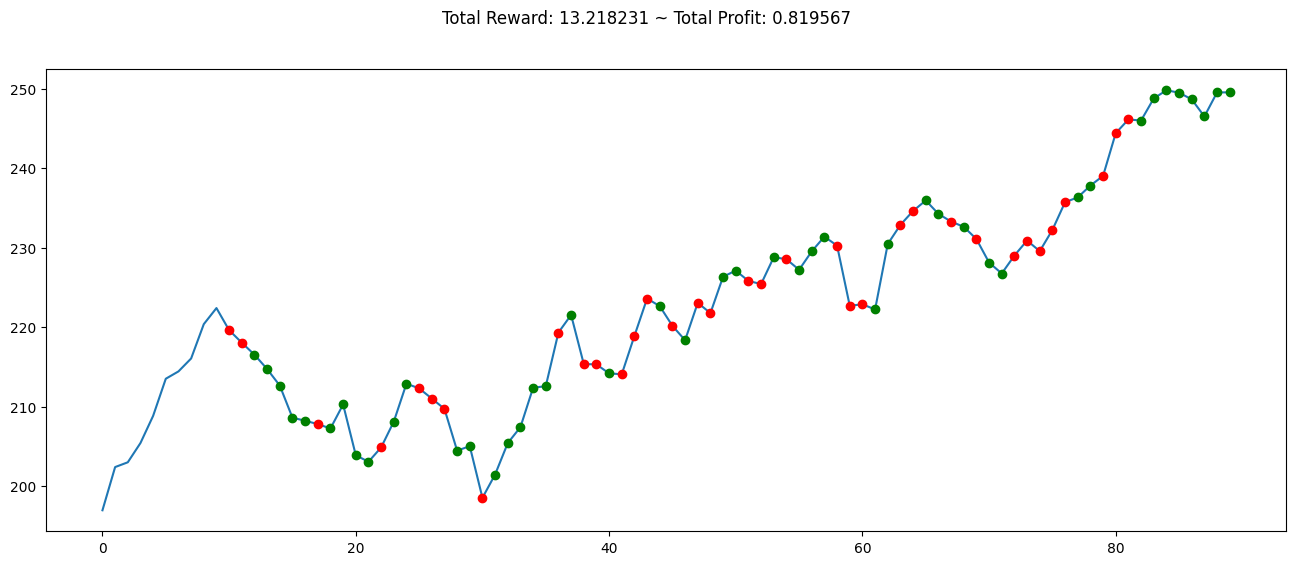

In [45]:
#A2C Model - 10k training steps
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

In [36]:
## Baseline Model - Random actions

# observation = env.reset()
# while True:
#     action = env.action_space.sample()
#     observation, reward, terminated, truncated, info = env.step(action)
#     done = terminated or truncated

#     if done:
#         print(f"info:{info}")
#         break

# plt.cla()
# env.unwrapped.render_all()
# plt.show()